In [1]:
# For cross-validation
FRACTION_TRAINING = 0.5

# For keeping output
detailed_output = {}

# dictionary for keeping model
model_dict = {}

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import linear_model
%matplotlib inline
plt.style.use("ggplot")

"""
Data Preprocessing

EXPERIMENT_DATA - Contain training data
EVALUATION_DATA - Contain testing data 
"""

EXPERIMENT_DATA = pickle.load(open('EXPERIMENT_SET_pandas.pkl', 'rb'))
EVALUATION_SET = pickle.load(open('EVALUATION_SET_pandas.pkl', 'rb'))

# Shuffle Data
EXPERIMENT_DATA = sklearn.utils.shuffle(EXPERIMENT_DATA)
EXPERIMENT_DATA = EXPERIMENT_DATA.reset_index(drop=True)


TRAINING_DATA = EXPERIMENT_DATA[:int(FRACTION_TRAINING*len(EXPERIMENT_DATA))]
TESTING_DATA = EXPERIMENT_DATA[int(FRACTION_TRAINING*len(EXPERIMENT_DATA)):]

# Consider only graduated species
TRAINING_DATA_GRAD = TRAINING_DATA[TRAINING_DATA["GRAD"] == "YES"]
TESTING_DATA_GRAD = TESTING_DATA[TESTING_DATA["GRAD"] == "YES"]

In [3]:
print("Graduate Training Data size: {}".format(len(TRAINING_DATA_GRAD)))
print("Graduate Testing  Data size: {}".format(len(TESTING_DATA_GRAD)))

Graduate Training Data size: 5992
Graduate Testing  Data size: 5940


In [4]:
def plotRegression(data):
    plt.figure(figsize=(8,8))
    
    ###########################
    # 1st plot: linear scale
    ###########################
    bagSold = np.asarray(data["BAGSOLD"]).reshape(-1, 1).astype(np.float)
    rm = np.asarray(data["RM"]).reshape(-1,1).astype(np.float)
    bias_term = np.ones_like(rm)
    x_axis = np.arange(rm.min(),rm.max(),0.01)
    
    # Liear Regression
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    print("Coefficients = {}".format(regr.coef_))
    print("Intercept = {}".format(regr.intercept_))
    
    # Find MSE
    mse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    
#     plt.subplot("121")
    plt.title('Linear Regression RM vs. Bagsold')
    true_value = plt.plot(rm, bagSold, 'ro', label='True Value')
    regression_line = plt.plot(x_axis, regr.intercept_[0] + regr.coef_[0][0]*x_axis, color="green")
    plt.legend(["true_value", "Regression Line\nMSE = {:e}".format(mse)])
    plt.xlabel("RM")
    plt.ylabel("Bagsold")
    plt.xlim(rm.min(),rm.max())
    detailed_output["MSE of linear regression on entire dataset (linear scale)"] = mse
    plt.savefig("linear_reg_entire_dataset_linearscale.png")
    plt.show()
    
    #######################
    # 2nd plot: log scale
    #######################
    plt.figure(figsize=(8,8))
    bagSold = np.log(bagSold)
    
    # Linear Regression 
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    bagSold_prediction = regr.predict(rm)
    print("Coefficients = {}".format(regr.coef_))
    print("Intercept = {}".format(regr.intercept_))
    
    # Find MSE
    mse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    
#     plt.subplot("122")
    plt.title('Linear Regression RM vs. log of Bagsold')
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(x_axis, regr.intercept_[0] + regr.coef_[0][0]*x_axis, color="green")
    plt.legend(["true_value", "Regression Line\nMSE = {:e}".format(mse)])
    plt.xlabel("RM")
    plt.ylabel("log Bagsold")
    plt.xlim(rm.min(),rm.max())
    detailed_output["MSE of linear regression on entire dataset (log scale)"] = mse
#     plt.savefig("linear_reg_entire_dataset_logscale.png")
    plt.show()


Coefficients = [[-15932.30228111]]
Intercept = [ 792617.66604889]


/Users/teerapatjenrungrot/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


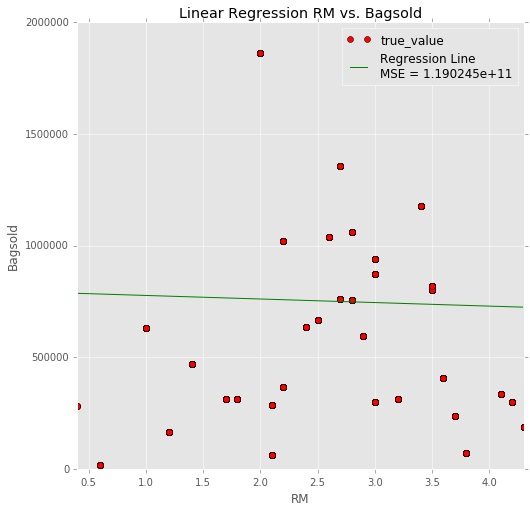

Coefficients = [[ 0.07877962]]
Intercept = [ 13.17210329]


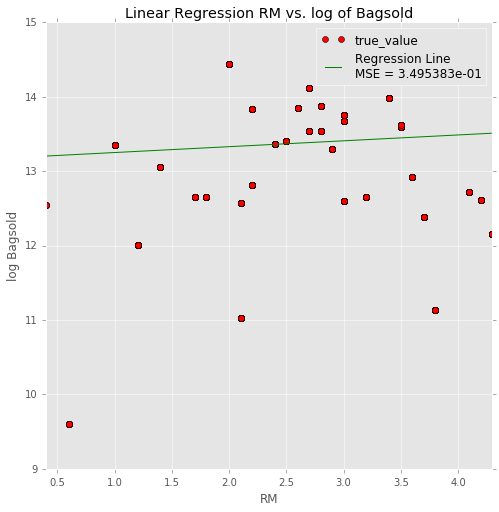

In [5]:
# Coefficients = [[-14956.36881671]]
# Intercept = [ 794865.84758174]
plotRegression(TRAINING_DATA_GRAD)

## Location-based algorithm

In [6]:
location_map = list(set(TRAINING_DATA_GRAD["LOCATION"]))
location_map.sort()
# print(location_map)

In [7]:
list_location = []
list_avg_rm = []
list_avg_yield = []
for val in location_map:
    avg_rm = np.average(TRAINING_DATA_GRAD[EXPERIMENT_DATA["LOCATION"] == str(val)]["RM"])
    avg_yield = np.average(TRAINING_DATA_GRAD[EXPERIMENT_DATA["LOCATION"] == str(val)]["YIELD"])
    list_location.append(str(val))
    list_avg_rm.append(avg_rm)
    list_avg_yield.append(avg_yield)
    # print("{} = {},{}".format(val,avg_rm,avg_yield))

/Users/teerapatjenrungrot/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/teerapatjenrungrot/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


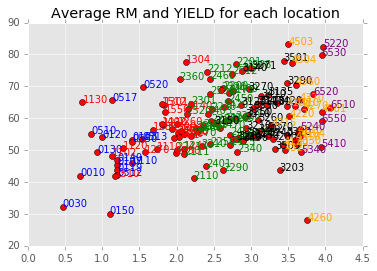

In [8]:
plt.title("Average RM and YIELD for each location")
plt.plot(list_avg_rm, list_avg_yield, 'ro')

for i, txt in enumerate(list_location):
    if int(txt) <= 1000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="blue")
    elif int(txt) <= 2000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="red")
    elif int(txt) <= 3000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="green")
    elif int(txt) <= 4000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="black")
    elif int(txt) <= 5000:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="orange")
    else:
        plt.annotate(txt, (list_avg_rm[i],list_avg_yield[i]), color="purple")
plt.show()


### Analysis

From the preliminary analysis, we find that the number of different locateion in the dataset is 140. The location in the dataset is encoded as a 4-digit number. We first expected that we can group the quality of the species based on the location parameters. We then plot the average of __RM__ and __YIELD__ for each location, which is shown below: 

## Linear Regression on each group of location

According to prior analaysis, it appears that we can possibly categorize species on location. The approach we decide to adopt is to use first digit of the location number as a categorizer. The histogram in the previous section indicates that there exists roughly about 7 groups. Notice that the leftmost and rightmost columns seem to be outliers.

The number of possible location is 135.


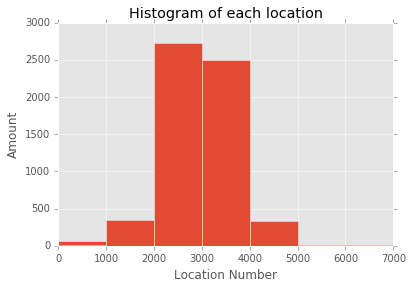

In [9]:
# Calculate the number of possible locations
location_set = set(TRAINING_DATA_GRAD["LOCATION"])
print("The number of possible location is {}.".format(len(location_set)))

location_histogram_list = []
for location in sorted(location_set):
    amount = len(TRAINING_DATA_GRAD[TRAINING_DATA_GRAD["LOCATION"] == str(location)])
    for j in range(amount):
        location_histogram_list.append(int(location))
#     print("Location {} has {:>3} species".format(location, amount))
    
plt.title("Histogram of each location")
plt.xlabel("Location Number")
plt.ylabel("Amount")
plt.hist(location_histogram_list, bins=7, range=(0,7000))
plt.savefig("location_histogram.png")
plt.show()

In [10]:
# Convert location column to numeric
TRAINING_DATA_GRAD["LOCATION"] = TRAINING_DATA_GRAD["LOCATION"].apply(pd.to_numeric)

# Separate training dataset into 7 groups
dataByLocation = []
for i in range(7):
    dataByLocation.append(TRAINING_DATA_GRAD[(TRAINING_DATA_GRAD["LOCATION"] < ((i+1)*1000)) & (TRAINING_DATA_GRAD["LOCATION"] >= (i*1000))])

/Users/teerapatjenrungrot/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.05328277023 1.0262956544
0.762338198505 0.873119807647
0.253807203837 0.503792818366
0.200542622706 0.447819855195
0.29628093697 0.544316945327
0.374676270693 0.612108054753
3.15544362088e-30 1.7763568394e-15


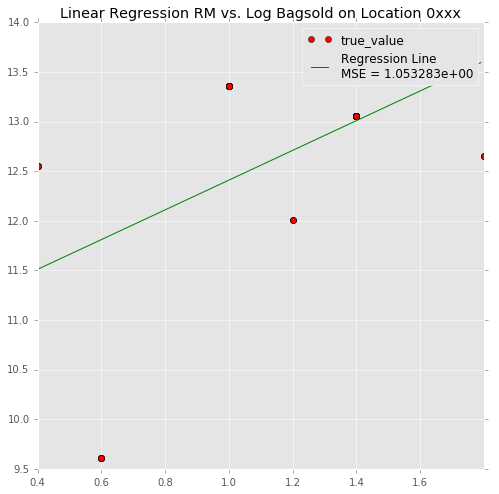

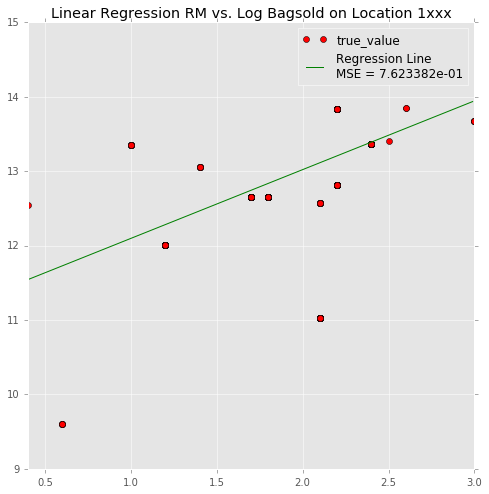

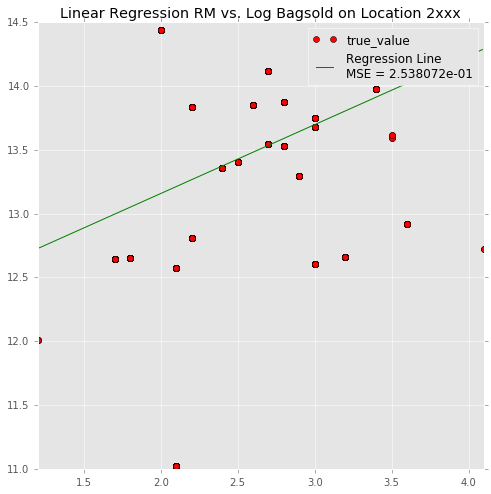

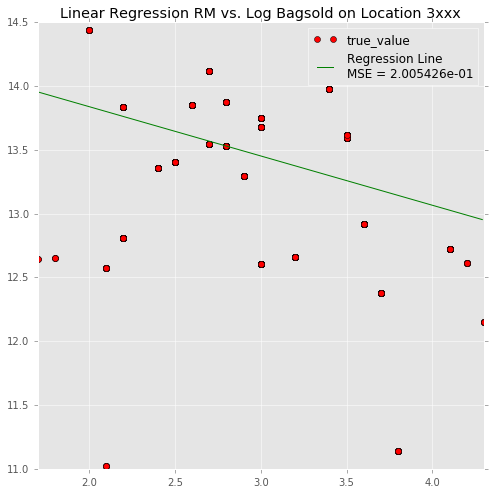

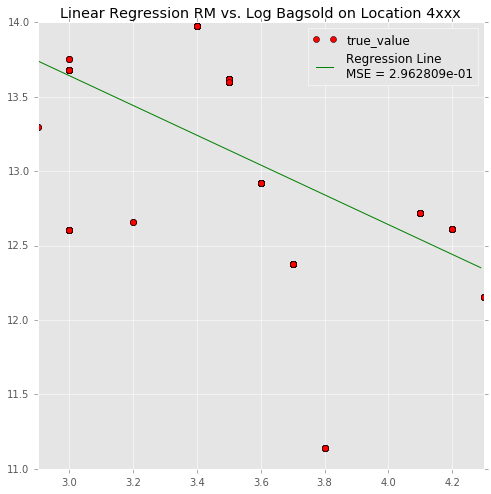

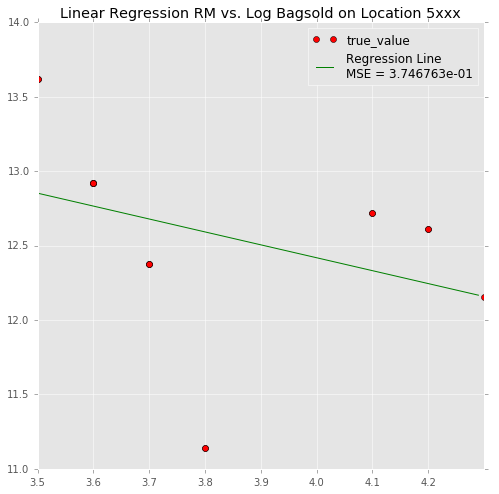

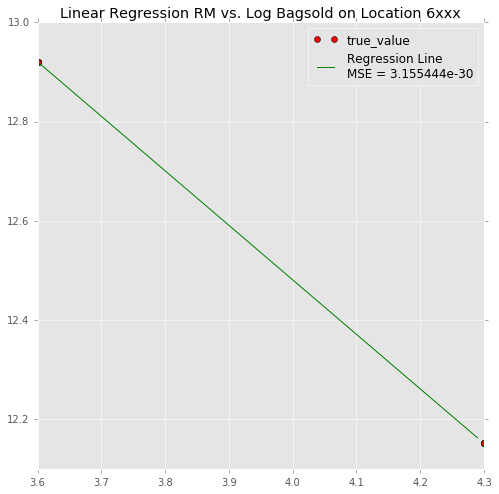

In [11]:
for i in range(len(dataByLocation)):
    data = dataByLocation[i]
    bagSold = np.log(np.asarray(data["BAGSOLD"]).reshape(-1,1).astype(np.float))
    rm = np.asarray(data["RM"]).reshape(-1,1).astype(np.float)
    
    # Liear Regression
    regr = linear_model.LinearRegression()
    regr.fit(rm, bagSold)
    model_dict[i] = regr
    bagSold_prediction = regr.predict(rm)
    
    x_axis = np.arange(rm.min(), rm.max(), 0.01).reshape(-1,1)
    
    # Find MSE
    mse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
    print(mse, np.sqrt(mse))
    detailed_output["number of data point on location {}xxx".format(i)] = len(data)
    detailed_output["MSE on location {}xxx log scale".format(i)] = mse
    
    plt.figure(figsize=(8,8))
#     plt.subplot("{}".format(int(str(len(dataByLocation))+str(1)+str(i+1))))
    plt.title("Linear Regression RM vs. Log Bagsold on Location {}xxx".format(i))
    
    true_value = plt.plot(rm,bagSold, 'ro', label='True Value')
    regression_line = plt.plot(x_axis, regr.predict(x_axis), color="green")
    plt.legend(["true_value", "Regression Line\nMSE = {:e}".format(mse)])
#     plt.show()
    plt.xlim(rm.min(),rm.max())
    plt.savefig("location{}.png".format(i))


## Test with validation set

In [12]:
# Test with validation set
TESTING_DATA_GRAD = TESTING_DATA_GRAD.reset_index(drop=True)

Xtest = np.column_stack((TESTING_DATA_GRAD["LOCATION"], 
                         TESTING_DATA_GRAD["RM"], 
                         TESTING_DATA_GRAD["YIELD"]))
ytest = TESTING_DATA_GRAD["BAGSOLD"].astype(np.float)
log_ytest = np.log(ytest)

In [13]:
ypredicted = []
for row in Xtest:
    location = row[0]
    rm_val = row[1]
    yield_val = row[2]
    
    model = model_dict[int(location[0])]
    prediction = model.predict(rm_val)[0][0]
    ypredicted.append(prediction)
    
ypredicted = np.array(ypredicted)

In [14]:
# MSE error
sklearn.metrics.mean_squared_error(log_ytest, ypredicted)

0.2834353635789868

#### Testing Ridge Reg vs. Linear Reg
Below is not used. It's for testing the difference between Ridge Regression and Linear Regression.
The result is that the MSE is almsot the same

In [15]:
bagSold = np.log(np.asarray(TRAINING_DATA_GRAD["BAGSOLD"]).reshape(-1, 1).astype(np.float))
rm = np.asarray(TRAINING_DATA_GRAD["RM"]).reshape(-1,1).astype(np.float)
yield_val = np.asarray(TRAINING_DATA_GRAD["YIELD"]).reshape(-1,1).astype(np.float)

x = np.column_stack((rm, yield_val))
    
# Liear Regression
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x, bagSold)
bagSold_prediction = regr.predict(x)
print("Coefficients = {}".format(regr.coef_))
print("Intercept = {}".format(regr.intercept_))
    
# Find MSE
mse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
print("MSE = {}".format(mse))

Coefficients = [[ 0.07116814  0.00414965]]
Intercept = [ 12.94839385]
MSE = 0.3469602260718588


In [16]:
bagSold = np.log(np.asarray(TRAINING_DATA_GRAD["BAGSOLD"]).reshape(-1, 1).astype(np.float))
rm = np.asarray(TRAINING_DATA_GRAD["RM"]).reshape(-1,1).astype(np.float)
yield_val = np.asarray(TRAINING_DATA_GRAD["YIELD"]).reshape(-1,1).astype(np.float)

x = np.column_stack((rm, yield_val))
    
# Liear Regression
regr = linear_model.Ridge(alpha=20000)
regr.fit(x, bagSold)
bagSold_prediction = regr.predict(x)
print("Coefficients = {}".format(regr.coef_))
print("Intercept = {}".format(regr.intercept_))
    
# Find MSE
mse = sklearn.metrics.mean_squared_error(bagSold, bagSold_prediction)
print("MSE = {}".format(mse))

Coefficients = [[ 0.0062339   0.00430852]]
Intercept = [ 13.11871673]
MSE = 0.3483090550422536
